# MNIST-Keras-NN

The following script executes a program for digit recognition on the mnist database using Keras Multi-layer Perceptron classifier

In [22]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time

%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns


### Configurations
# Training-Size
num_train = 15000                   # 60000 for full data set 
num_test  = 2500                    # 10000 for full data set


# Use GridSearchCV to look up optimal parameters (see below)
hyper_parameter_search = False       # True/False: Run hyper-parameter search via GridSearchCV. Takes a long time.


In [23]:
# Simple function to log information
training_results = 'keras-nn-training-log.txt'
def log_training_results(*s):
    with open(training_results, 'a') as f:
        for arg in s:
            print(arg, file=f)
            print(arg)

In [24]:
# Fetch MNIST-Data from Keras repository
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
# Display (Train) (Test) datasets
print("Shape of training data:\t\t", X_train.shape)
print("Shape of training labels:\t", y_train.shape)
print("Shape of testing data:\t\t", X_test.shape)
print("Shape of testing labels:\t", y_test.shape)

# i.e.: We have 60000 images with a size of 28x28 pixels


Shape of training data:		 (60000, 28, 28)
Shape of training labels:	 (60000,)
Shape of testing data:		 (10000, 28, 28)
Shape of testing labels:	 (10000,)


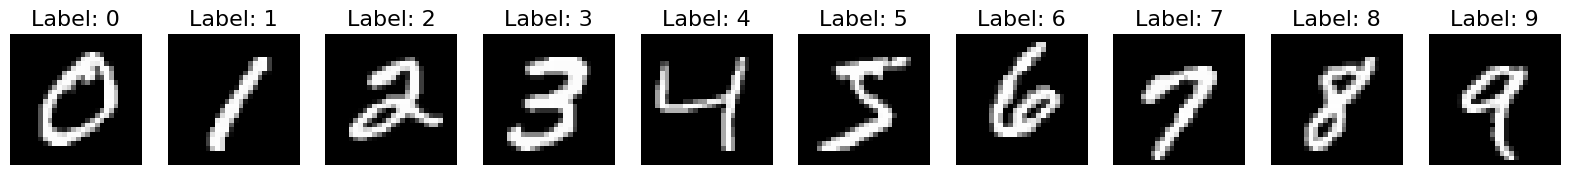

In [26]:
# Visualize some examples
num_classes = 10 # 0 .. 9
f, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(0, num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)
  ax[i].axis('off')

In [27]:
# Reshape the data such that we have access to every pixel of the image
# The reason to access every pixel is that only then we can apply deep learning ideas and can assign color code to every pixel.
train_data = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
train_label = y_train.astype("float32")

test_data = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')
test_label = y_test.astype("float32")

In [28]:
# We know the RGB color code where different values produce various colors. It is also difficult to remember every color combination. 
# We already know that each pixel has its unique color code and also we know that it has a maximum value of 255. 
# To perform Machine Learning, it is important to convert all the values from 0 to 255 for every pixel to a range of values from 0 to 1.
train_data = train_data / 255
test_data = test_data / 255

In [29]:
# Force the amount of columns to fit the necessary sizes required by the neural network
train_label = keras.utils.to_categorical(train_label, num_classes)
test_label = keras.utils.to_categorical(test_label, num_classes)

In [30]:
# As an optional step, we decrease the training and testing data size, such that the algorithms perform their execution in acceptable time
train_data = train_data[1:num_train,]
train_label = train_label[1:num_train]

test_data = test_data[1:num_test,]
test_label = test_label[1:num_test]

In [31]:
# Display (Train) (Test) datasets

print("Reshaped training data:\t\t", train_data.shape)
print("Reshaped training labels:\t", train_label.shape)
print("Reshaped testing data:\t\t", test_data.shape)
print("Reshaped testing labels:\t", test_label.shape)

# As we can see: We now have X images with 784 pixels in total
# We now operate on this data

Reshaped training data:		 (14999, 784)
Reshaped training labels:	 (14999, 10)
Reshaped testing data:		 (2499, 784)
Reshaped testing labels:	 (2499, 10)


## Multi-layer Perceptron classifier

For more information, see: https://keras.io/guides/sequential_model/ 

In [32]:
# Create model: https://keras.io/guides/sequential_model/
model = Sequential()

# Create model layers
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Additional learning configurations
batch_size = 512
epochs=10


In [34]:
# Train model
start_time = time.time()
model.fit(x=train_data, y=train_label, batch_size=batch_size, epochs=epochs)
end_time = time.time() - start_time

params = {"Keras":{}}
log_training_results("[%s] Trained new model: %s in %s seconds" % (datetime.now(), params, end_time))


Epoch 1/10
30/30 [==============================] - 0s 4ms/step - loss: 1.3206 - accuracy: 0.6240
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4685 - accuracy: 0.8651
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3460 - accuracy: 0.9005
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.9201
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.2377 - accuracy: 0.9329
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.9401
Epoch 7/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1830 - accuracy: 0.9485
Epoch 8/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1574 - accuracy: 0.9542
Epoch 9/10
30/30 [==============================] - 0s 4ms/step - loss: 0.1418 - accuracy: 0.9605
Epoch 10/10
30/30 [==============================] - 0s 4ms/step - loss: 0.1254 - accuracy: 0.9645
[2022-09-11 12:34:1

In [35]:
# Evaluate model based on supplied tags
start_time = time.time()
test_loss, test_acc = model.evaluate(train_data, train_label)
end_time = time.time() - start_time

log_training_results("\tRunning Predictions on Train-Data --  execution time: %ss" % (end_time))
log_training_results("\tScore data on %s -- Test accuracy on train-data: %s; Test loss on train-data: %s" % (params, test_acc, test_loss))  

469/469 [==============================] - 1s 1ms/step - loss: 0.0894 - accuracy: 0.9753
	Running Predictions on Train-Data --  execution time: 0.6729567050933838s
	Score data on {'Keras': {}} -- Test accuracy on train-data: 0.9752650260925293; Test loss on train-data: 0.08940862119197845


In [36]:
# Evaluate model based on supplied tags
start_time = time.time()
test_loss, test_acc = model.evaluate(test_data, test_label)
end_time = time.time() - start_time

log_training_results("\tRunning Predictions on Test-Data --  execution time: %ss" % (end_time))
log_training_results("\tScore data on %s -- Test accuracy on test-data: %s; Test loss on test-data: %s" % (params, test_acc, test_loss))  

79/79 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9348
	Running Predictions on Test-Data --  execution time: 0.18859171867370605s
	Score data on {'Keras': {}} -- Test accuracy on test-data: 0.9347739219665527; Test loss on test-data: 0.203933984041214


In [37]:
# Let model predict data
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

print(y_pred)
print(y_pred_classes)

79/79 [==============================] - 0s 1ms/step
[[2.5534480e-05 6.2563602e-04 9.9348539e-01 ... 1.8649408e-06
  7.2190720e-05 2.9647671e-07]
 [2.6942109e-05 9.9193686e-01 1.0626416e-03 ... 2.0334518e-03
  1.6126671e-03 1.7459845e-04]
 [9.9971151e-01 1.4068387e-06 2.6119800e-05 ... 7.3746298e-05
  1.2890587e-06 3.5292298e-05]
 ...
 [1.1283164e-06 2.1268521e-05 9.3814760e-06 ... 4.7826161e-05
  1.0639982e-02 8.8666779e-01]
 [8.5881393e-06 7.1645096e-05 5.8290454e-05 ... 6.0434936e-04
  2.5457673e-04 1.3192339e-02]
 [6.9569035e-07 4.8334692e-05 4.3017284e-05 ... 1.2997590e-04
  2.2791899e-05 7.1091182e-04]]
[2 1 0 ... 9 4 4]


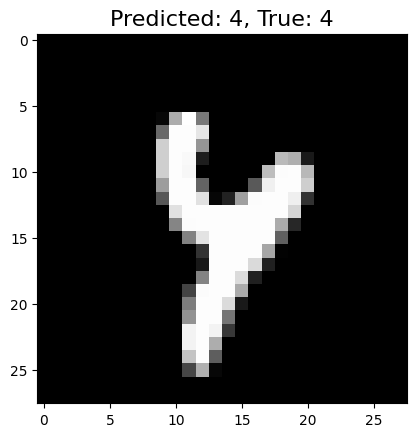

In [38]:
# View a correctly predicted datapoint
random_idx = np.random.choice(len(test_data))
x_sample = test_data[random_idx]
y_true = np.argmax(test_label, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

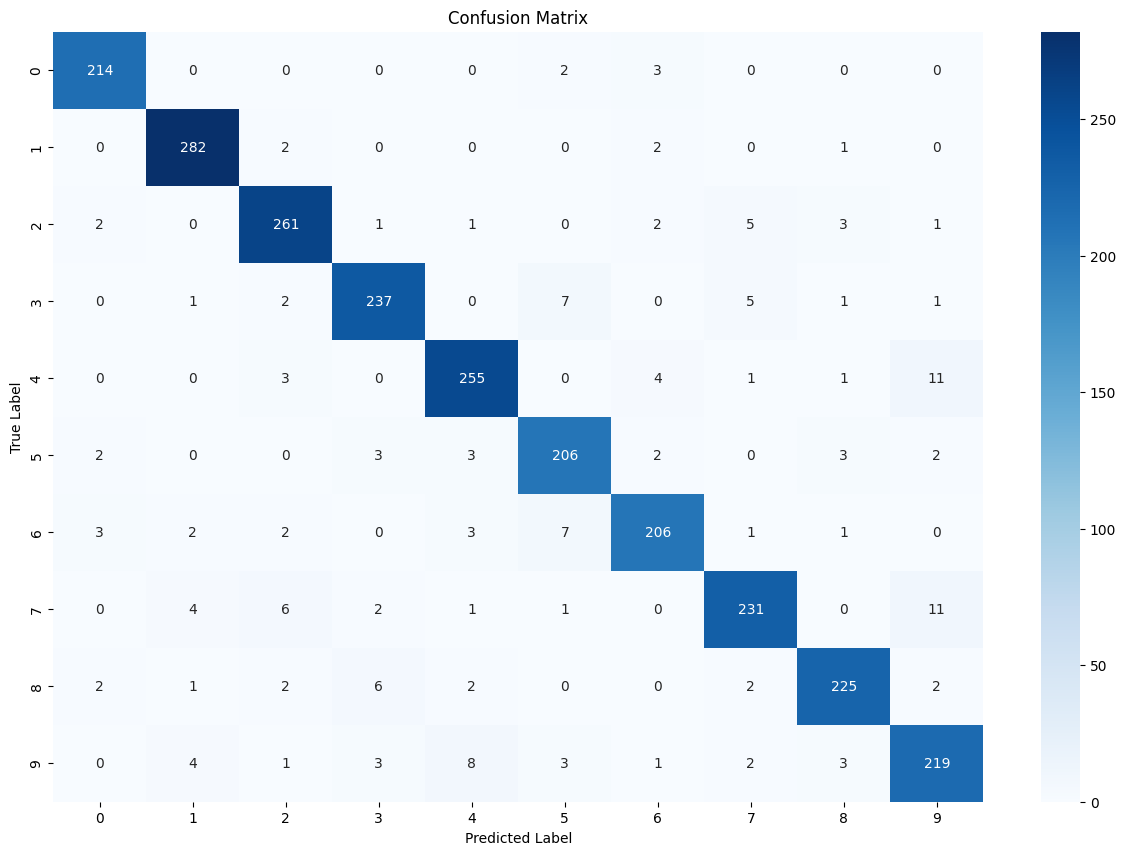

In [39]:
# Visualize estimation over correct and incorrect prediction via confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

In [40]:
# Review some Errors
# Create some sets of data
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = test_data[errors]

In [41]:
# Aggregate error set results
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

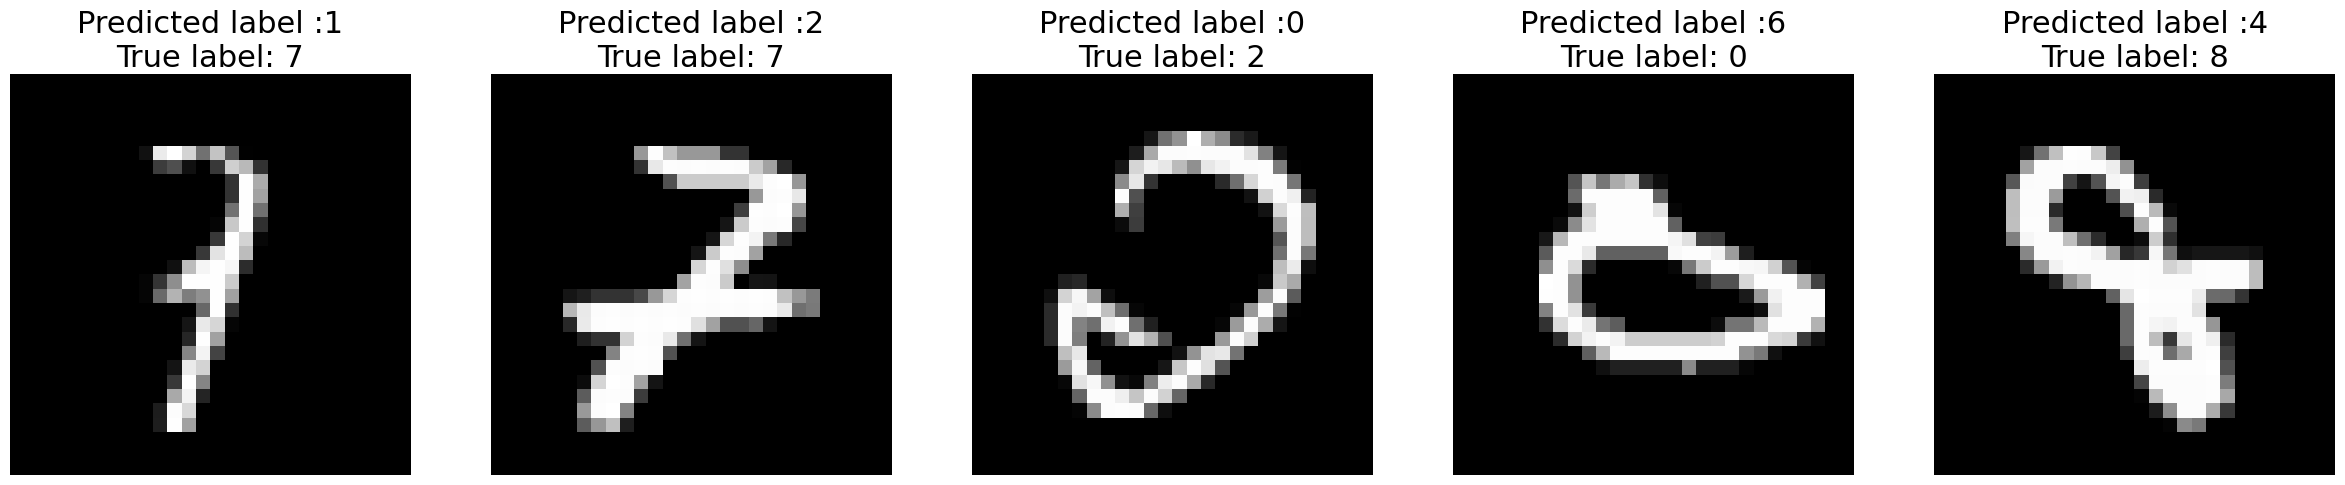

In [42]:
# Show error points which were the most failing ones
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)
  ax[i].axis('off')